In [559]:
# Install all dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
import random
import math as math

In [665]:
# THINGS WE NEED TO CREATE

'''

1) A list of all the nodes we need to consider
2) For each node, there needs to be an ideal type, a tolerance level, and a utility function type
3) Class is initiated with a list of lists and number of nodes for each type to be initiated

4) At initialisation, an unweighted undirected graph is generated for all the nodes (with no links)
5) Get the initial adjacency matrix
6) Creation of arrays
    6a) Create an array to store links that we need to visit (from adjacency matrix, remove duplicates)
    6b) Store max number of unique links that can occur
    6c) Store an array of links that we need to visit from the future (initially empty)

7) Generate a secondary network for the g-tree (which is directed) to store all adjacency matrices of node network, this is currently empty

8) While there are no cycles in the g-tree (so first thing is to test) OR 'to_visit' array is empty:
    8a) Choose an element randomly from the 'to_visit' array
    8b) If the link is already filled, check if either node wants to cut it -> if so remove link
    8c) If the link is not filled, check if either node is better off with the link -> if so add link
    8d) If there has been no change to network, remove from 'to_visit' array
    8d) If there has been a change:
        8d.1) Get current adjacency matrix. Check if nodes in g-tree have this adjacency matrix
              If not, add a new node to g-tree with this adjacency matrix as attribute, and add directed edge
              If already exists, add edge only (means we have cycle)
        8d.2) Re-initialise 'to_visit' array to contain all edges again
9) Store statistics relating to network


HELPER FUNCTIONS:

a) Utility function for a user, given utility function type, tolerance level, ideal stance, and adjacency matrix, decay factor
b) Sub-utility for a user given another user, graph structure (will need shortest path), utility function type, tolerance level, ideal stance



'''

"\n\n1) A list of all the nodes we need to consider\n2) For each node, there needs to be an ideal type, a tolerance level, and a utility function type\n3) Class is initiated with a list of lists and number of nodes for each type to be initiated\n\n4) At initialisation, an unweighted undirected graph is generated for all the nodes (with no links)\n5) Get the initial adjacency matrix\n6) Creation of arrays\n    6a) Create an array to store links that we need to visit (from adjacency matrix, remove duplicates)\n    6b) Store max number of unique links that can occur\n    6c) Store an array of links that we need to visit from the future (initially empty)\n\n7) Generate a secondary network for the g-tree (which is directed) to store all adjacency matrices of node network, this is currently empty\n\n8) While there are no cycles in the g-tree (so first thing is to test) OR 'to_visit' array is empty:\n    8a) Choose an element randomly from the 'to_visit' array\n    8b) If the link is already 

In [1355]:
# --------------- FUNCTIONS TO GENERATE NODE LISTS ON DEMAND ------------------ 

# Generate a node list (default utility function, default type distribution, default tolerance distribution)
def generate_node_list(node_number, uf="norm", type_dist="uniform", tol_dist="uniform"):
    
    # Initialise count and node_list to store results
    count = 0
    node_list = []
    
    # Create the node_list
    while (count < node_number):
        
        temp = []
        
        # Add value for the node's type
        if (type_dist == "uniform"):
            temp.append(uniform_dist_generator())
        
        elif (type_dist == "normal"):
            temp.append(normal_dist_generator())
        
        elif (type_dist == "beta"):
            temp.append(beta_dist_generator())
        
        elif (type_dist == "exp"):
            temp.append(exp_dist_generator())
            

        # Add value for the node's tolerance
        if (tol_dist == "uniform"):
            temp.append(uniform_dist_generator())
            
        elif (tol_dist == "normal"):
            temp.append(normal_dist_generator())
        
        elif (tol_dist == "beta"):
            temp.append(beta_dist_generator())
        
        elif (tol_dist == "exp"):
            temp.append(exp_dist_generator())
        
        # Add the utility function type
        temp.append(uf)
        
        # Append the temp to the node_list
        node_list.append(temp)
        
        # Increment the count
        count += 1
    
    return node_list

# Helper function to return a value from the Uniform distribution
def uniform_dist_generator():
    return np.random.uniform()

# Helper function to return a value from the Normal distribution
def normal_dist_generator():
    return np.random.normal()

# Helper function to return a value from the Beta distribution (both shape parameters under 1)
def beta_dist_generator():
    return np.random.beta(0.5, 0.5)

# Helper function to return a value from the Exponential distribution
def exp_dist_generator():
    return np.random.exponential()

# Helper function to create a bifurcated two party system
def generate_two_party_list(nodes_per_group, tol_dist="uniform", uf="norm"):
    
    # Initialise variables
    party1_list = []
    party2_list = []
    count = 0
    
    # Loop
    while (count < nodes_per_group):
        
        # Temp variables
        temp1 = []
        temp2 = []
        
        # Add the types
        temp1.append(0)
        temp2.append(1)
        
        # Add the tolerance
        if (tol_dist == "uniform"):
            temp1.append(uniform_dist_generator())
            temp2.append(uniform_dist_generator())
            
        elif (tol_dist == "normal"):
            temp1.append(normal_dist_generator())
            temp2.append(normal_dist_generator())
        
        elif (tol_dist == "beta"):
            temp1.append(beta_dist_generator())
            temp2.append(beta_dist_generator())
        
        elif (tol_dist == "exp"):
            temp1.append(exp_dist_generator())
            temp2.append(exp_dist_generator())
        
        # Append to temp
        temp1.append(uf)
        temp2.append(uf)
        
        # Add to total list
        party1_list.append(temp1)
        party2_list.append(temp2)
        
        # Increment
        count += 1
    
    # Add all to node_list
    node_list = party1_list + party2_list
    
    return node_list
    
    
# Helper function to generate a three party system
def generate_three_party_list(nodes_per_group, tol_dist="uniform", uf="norm"):
    
    # Initialise variables
    party1_list = []
    party2_list = []
    party3_list = []
    count = 0
    
    # Loop
    while (count < nodes_per_group):
        
        # Temp variables
        temp1 = []
        temp2 = []
        temp3 = []
        
        # Add the types
        temp1.append(0)
        temp2.append(1)
        temp3.append(0.5)
        
        # Add the tolerance
        if (tol_dist == "uniform"):
            temp1.append(uniform_dist_generator())
            temp2.append(uniform_dist_generator())
            temp3.append(uniform_dist_generator())
            
        elif (tol_dist == "normal"):
            temp1.append(normal_dist_generator())
            temp2.append(normal_dist_generator())
            temp3.append(normal_dist_generator())
        
        elif (tol_dist == "beta"):
            temp1.append(beta_dist_generator())
            temp2.append(beta_dist_generator())
            temp3.append(beta_dist_generator())
            
        elif (tol_dist == "exp"):
            temp1.append(exp_dist_generator())
            temp2.append(exp_dist_generator())
            temp3.append(exp_dist_generator())
        
        # Append to temp
        temp1.append(uf)
        temp2.append(uf)
        temp3.append(uf)
        
        # Add to total list
        party1_list.append(temp1)
        party2_list.append(temp2)
        party3_list.append(temp3)
        
        # Increment
        count += 1
    
    # Add all to node_list
    node_list = party1_list + party2_list + party3_list
    
    return node_list
        

In [1356]:
print(generate_three_party_list(7))
print(len(generate_three_party_list(7)))

[[0, 0.3004034892423382, 'norm'], [0, 0.5643664662492348, 'norm'], [0, 0.3824876721738879, 'norm'], [0, 0.8011201073422651, 'norm'], [0, 0.34961086094173954, 'norm'], [0, 0.9535930984389119, 'norm'], [0, 0.4952231837301717, 'norm'], [1, 0.2616467503444251, 'norm'], [1, 0.4806938814740094, 'norm'], [1, 0.41142832830124143, 'norm'], [1, 0.8405568590349854, 'norm'], [1, 0.02326447693104461, 'norm'], [1, 0.14719859623617249, 'norm'], [1, 0.5703816655662158, 'norm'], [0.5, 0.922695651107002, 'norm'], [0.5, 0.4415965162602805, 'norm'], [0.5, 0.053251384615908615, 'norm'], [0.5, 0.213747748405411, 'norm'], [0.5, 0.7121852341500494, 'norm'], [0.5, 0.9653777564949488, 'norm'], [0.5, 0.7026135564023605, 'norm']]
21


In [1445]:
class PSNG(object):
    
    # Initialisation
    def __init__(self, node_attr_list, cost_shift):
        
        # Initialise the variables
        self.node_attr_list = node_attr_list
        self.number_of_nodes = len(node_attr_list)
        self.social_network = nx.Graph()
        self.g_tree = nx.DiGraph()
        self.iter_count = 0
        self.current_gtree_node = 0
        self.decay = 0.9
        self.uf_at_index = 2
        self.type_at_index = 0
        self.tol_at_index = 1
        self.cost_shift = cost_shift
        
        # Utility function constant variable names
        self.uf_decl_norm = "norm"
        
        # Fill the social_network with the nodes plus their attributes
        self.add_nodes_to()
    
        # Add the current state of the network to the g_tree
        self.adj_matrix = self.update_adj_matrix()
        self.g_tree.add_node(self.current_gtree_node, adj_matrix=self.adj_matrix)
        
        # Need to store an array of all the edges that need to be visited
        self.to_visit = self.reinitialise_to_visit_array()
        
    
    # Function to dynamically create a pairwise stable function, or identify a closed cycle if one does not exist
    def dynamic_network_formation(self):
        
        '''
        # Current counter to break loop during development (DEVELOPMENT)
        counter = 0
        '''
        
        # Loop until either find a cycle in the g_tree, or we have visited all potential edges (i.e. pairwise stable network)
        while ((len(list(nx.simple_cycles(self.g_tree))) == 0) and (len(self.to_visit) != 0)):
            
            # Choose an element randomly from the 'to_visit' array
            edge_to_assess = random.choice(self.to_visit)
            
            # Remove the element from the 'to_visit' array
            self.to_visit.remove(edge_to_assess)
            
            # Get the two current nodes under consideration
            first_node = edge_to_assess[0]
            second_node = edge_to_assess[1]
            
            # Check if the edge under consideration is already linked or not
            is_edge_filled = self.adj_matrix.item((first_node, second_node))
            
            # print(first_node, second_node)

            # Branching decision 1: if edge does not exist    
            if (is_edge_filled == 0):
                
                # Call method to check whether edge should be added or not (if true, then edge is added already)
                if (self.check_to_add_edge(first_node, second_node) == False):
                    
                    # Remove the link if the addition is not beneficial to both parties - i.e. status quo
                    self.social_network.remove_edge(first_node, second_node)
                
                # Otherwise, update the adjacency matrix, and g_tree
                else:
                    
                    # Update the adjacency matrix
                    self.adj_matrix = self.update_adj_matrix()
                
                    # Check whether g_tree needs to be updated
                    self.update_g_tree(self.adj_matrix)
                    
                    # Reinitialise the to_visit array
                    self.to_visit = self.reinitialise_to_visit_array()
    
            # If the edge does already exist
            elif (is_edge_filled == 1):
                
                # Call method to check whether edge should be removed or not (if true, then edge is removed already)
                if (self.check_to_remove_edge(first_node, second_node) == False):
                    
                    # Re-add the link if the removal is not beneficial for either party - i.e. status quo
                    self.social_network.add_edge(first_node, second_node)
                
                else:
                    
                    # Update the adjacency matrix
                    self.adj_matrix = self.update_adj_matrix()
                
                    # Check whether g_tree needs to be updated
                    self.update_g_tree(self.adj_matrix)
                    
                    # Reinitialise the to_visit array
                    self.to_visit = self.reinitialise_to_visit_array()
        
            '''
            # Increment the counter at each loop and break at max (DEVELOPMENT)
            counter = counter + 1
            
            if (counter == 100):
                print(first_node)
                print(second_node)
                break
            '''
        
        if (len(list(nx.simple_cycles(self.g_tree))) != 0):
            print("Cycle found")
        
    
    # --------------- SOCIAL NETWORK HELPER FUNCTIONS ---------------- 
    
    # Function to take a node_attr_list and add the nodes with their attributes to the social_network
    def add_nodes_to(self):
        for node in range(0, len(self.node_attr_list)):
            self.social_network.add_node(node, attr=self.node_attr_list[node])
    
    # Function to reinstantiate the 'to_visit' array to include the max of all edges that could exist in a complete graph
    def reinitialise_to_visit_array(self):
        
        # Retrieve all current edges and non-existent edges
        edges = nx.edges(self.social_network)
        non_edges = nx.non_edges(self.social_network)
        return list(edges) + list(non_edges)
    
    # Helper function to add an edge to the social network graph (and test the adjacency matrix)
    def add_edge_to_social_network(self, node1, node2):
        self.social_network.add_edge(node1, node2)
        self.adj_matrix = self.update_adj_matrix()
        
    # Helper function to update the state of the adjacency matrix
    def update_adj_matrix(self):
        return nx.adjacency_matrix(self.social_network, nodelist=range(self.number_of_nodes)).todense()
    
    # Helper function to print the current state of the adjacency matrix
    def print_adj_matrix(self):
        print(self.adj_matrix)
    
    # Helper function to check if edge should be added to graph
    def check_to_add_edge(self, node1, node2):
        
        # Calculate the current utilities of the two nodes
        node1_utility_prior = self.calculate_total_utility(node1)
        node2_utility_prior = self.calculate_total_utility(node2)
        
        # Add the edge to the graph
        self.social_network.add_edge(node1, node2)
        
        # Recalculate the utilities
        node1_utility_after = self.calculate_total_utility(node1)
        node2_utility_after = self.calculate_total_utility(node2)
        
        # print(node1_utility_prior, node1_utility_after, "and", node2_utility_prior, node2_utility_after)
        
        # If both of these utilities post the additional edge have increased, return True; otherwise False
        if ((node1_utility_after >= node1_utility_prior) and (node2_utility_after >= node2_utility_prior)):
            return True
        
        return False
    
    # Helper function to check if edge should be removed to graph
    def check_to_remove_edge(self, node1, node2):
        
        # Calculate the current utilities of the two nodes
        node1_utility_prior = self.calculate_total_utility(node1)
        node2_utility_prior = self.calculate_total_utility(node2)
        
        # Remove the edge from the graph
        self.social_network.remove_edge(node1, node2)
        
        # Recalculate the utilities
        node1_utility_after = self.calculate_total_utility(node1)
        node2_utility_after = self.calculate_total_utility(node2)
        
        # print(node1_utility_prior, node1_utility_after, "and", node2_utility_prior, node2_utility_after)
        
        # If either of these utilities is strictly higher after the removal than before, then return True
        if ((node1_utility_after > node1_utility_prior) or (node2_utility_after > node2_utility_prior)):
            return True
    
        return False
    
    # Helper function to calculate utility for a node from the graph structure
    def calculate_total_utility(self, node):
        
        # Get a dict of all reachable nodes from source, by shortest path length
        reachable_nodes = nx.single_source_shortest_path_length(self.social_network, node)
        
        # Store value of total utility
        total_utility = 0
        
        # Loop through the dict, calculate sub utilities with other reachable nodes, and decay at path length
        for dest in reachable_nodes.keys():
            total_utility += (self.decay ** reachable_nodes[dest]) * self.calculate_node_to_node_utility(node, dest)
            
            '''
            if (reachable_nodes[dest] < 5):
                total_utility += (self.decay ** reachable_nodes[dest]) * self.calculate_node_to_node_utility(node, dest)
            else:
                total_utility += 0
            '''
        
        # Return the total_utility
        return total_utility
        
    
    # Helper function to calculate the node-to-node utility, as a switchboard to the preferred utility function type
    def calculate_node_to_node_utility(self, src, dest):
        
        # Extract node attribute from source node
        uf_type = self.social_network.node[src]['attr'][self.uf_at_index]
        
        # Switchboard for the relevant utility function
        if (uf_type == self.uf_decl_norm):
            return self.uf_norm(src, dest)
        
    
    # --------------- UTILITY FUNCTIONS ----------------
    
    # Utility function implementation for the adjusted Normal distribution function
    def uf_norm(self, src, dest):
        
        # Get the attributes from src and dest
        src_type = self.social_network.node[src]['attr'][self.type_at_index]
        src_tol = self.social_network.node[src]['attr'][self.tol_at_index]
        dest_type = self.social_network.node[dest]['attr'][self.type_at_index]
        
        # Create the function
        constant = 1 / math.sqrt(2 * math.pi)
        
        try:
            exponent = math.exp(-0.5*(dest_type - src_type)*(dest_type - src_type)/(src_tol*src_tol))
        except:
            exponent = 0
        
        return 1*exponent - self.cost_shift
    
    
    # --------------- G-TREE HELPER FUNCTIONS ----------------
    
    # Helper function to update the g_tree
    def update_g_tree(self, adj_matrix):
        
        # Search for whether the g_tree already has recorded this state of the adjacency matrix
        found, node_already_found = self.does_node_already_exist(adj_matrix)

        # Temporarily store a reference to the current node in the g_tree
        src_node = self.current_gtree_node
        
        # If not found, then add a new node to the g_tree with the current updated adj_matrix
        if (found == False):
            self.iter_count += 1
            self.g_tree.add_node(self.iter_count, adj_matrix=self.adj_matrix)
            self.current_gtree_node = self.iter_count
            self.g_tree.add_edge(src_node, self.current_gtree_node)
            
        # Otherwise the node exists, so add an edge to the network, and reset the current_gtree_node
        elif (found == True):
            self.g_tree.add_edge(src_node, node_already_found)
            self.current_gtree_node = node_already_found
    
    # Helper function to find whether a node in the g_tree already has the same adjacency matrix as the current iteration
    def does_node_already_exist(self, adj_matrix):
    
        # Search for nodes in g_tree that have the same attributes as current state of the adjacency matrix
        shared_nodes = [node for node in self.g_tree.nodes(data=True) if (node[1]["adj_matrix"] == adj_matrix).all()]
    
        # test = [node for node in self.g_tree.nodes(data=True)]
    
        # Generate a boolean based on the above
        found = any(shared_nodes)
        
        # If found is False, then we can return None for node_already_found
        if (found == False):
            node_already_found = None
            
            # node_already_found = test[0][0]
            
            return found, node_already_found
        
        # Otherwise collect the node (which must be unique) number -> either way does not matter as algorithm will soon terminate
        node_already_found = shared_nodes[0][0]
    
        # Return the finding
        return found, node_already_found

    # Helper function to print g_tree
    def print_g_tree_path(self):
        print(self.g_tree.nodes())
    
    # Helper function to print current node details for latest node in the gtree
    def print_latest_g_tree_node(self):
        print(self.g_tree.node[self.current_gtree_node])
        
    # Helper function to add a new node to the g_tree, with an input adjacency matrix
    def add_new_node_g_tree(self, node_number, adj_matrix):
        self.g_tree.add_node(node_number, adj_matrix=adj_matrix)
    
    # Helper function to print all the edges from the g_tree
    def print_g_tree_all_edges(self):
        print(self.g_tree.edges())
    
    # Helper function to add an edge to a g_tree
    def g_tree_add_edge(self, src, dest):
        self.g_tree.add_edge(src, dest)

/Users/dominicaits/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/dominicaits/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/dominicaits/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/dominicaits/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/Users/d

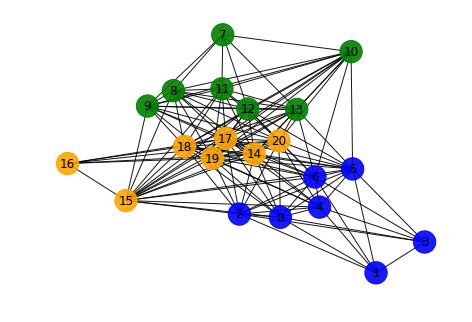

{0: 0.6000000000000001, 1: 0.30000000000000004, 2: 0.6000000000000001, 3: 0.30000000000000004, 4: 0.6000000000000001, 5: 0.75, 6: 0.75, 7: 0.30000000000000004, 8: 0.6000000000000001, 9: 0.6000000000000001, 10: 0.7000000000000001, 11: 0.6000000000000001, 12: 0.7000000000000001, 13: 0.7000000000000001, 14: 0.8500000000000001, 15: 0.8500000000000001, 16: 0.30000000000000004, 17: 0.8500000000000001, 18: 0.8500000000000001, 19: 0.8500000000000001, 20: 0.8500000000000001}
0.8410417313778658
6


In [1447]:
# Test framework for the three party model
test = PSNG(generate_three_party_list(7, "normal"), 0.25)

test.dynamic_network_formation()

colour_map = []
for i in test.social_network:
    if (test.social_network.node[i]['attr'][0] < 0.5):
        colour_map.append('blue')
    elif (test.social_network.node[i]['attr'][0] > 0.5):
        colour_map.append('green')
    else:
        colour_map.append('orange')

nx.draw(test.social_network, node_color=colour_map, alpha=0.9, node_size=500, with_labels=True)
plt.show()

print(nx.degree_centrality(test.social_network))

print(nx.average_clustering(test.social_network))

print(nx.graph_number_of_cliques(test.social_network))


/Users/dominicaits/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/dominicaits/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/dominicaits/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/dominicaits/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/Users/d

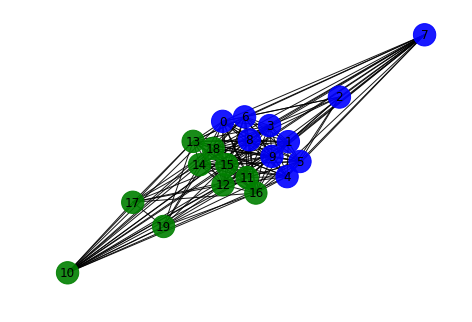

{0: 0.894736842105263, 1: 0.894736842105263, 2: 0.47368421052631576, 3: 0.894736842105263, 4: 0.894736842105263, 5: 0.894736842105263, 6: 0.894736842105263, 7: 0.894736842105263, 8: 0.894736842105263, 9: 0.894736842105263, 10: 0.9473684210526315, 11: 0.9473684210526315, 12: 0.9473684210526315, 13: 0.9473684210526315, 14: 0.9473684210526315, 15: 0.9473684210526315, 16: 0.9473684210526315, 17: 0.47368421052631576, 18: 0.9473684210526315, 19: 0.47368421052631576}
0.9264705882352942
3


In [1426]:
# Test framework for the bifurcated model
test = PSNG(generate_two_party_list(10, "normal"), 0.00000001)

test.dynamic_network_formation()

colour_map = []
for i in test.social_network:
    if (test.social_network.node[i]['attr'][0] < 0.5):
        colour_map.append('blue')
    elif (test.social_network.node[i]['attr'][0] > 0.5):
        colour_map.append('green')
    else:
        colour_map.append('yellow')

nx.draw(test.social_network, node_color=colour_map, alpha=0.9, node_size=500, with_labels=True)
plt.show()

print(nx.degree_centrality(test.social_network))

print(nx.average_clustering(test.social_network))

print(nx.graph_number_of_cliques(test.social_network))
